# Chess game analyses

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [409]:
df1 = pd.read_csv("games.csv")
df2 = pd.read_csv("games.csv")

In [410]:
df1.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


In [411]:
df1.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [412]:
df1.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [413]:
df1.describe(include = 'object')

,id,victory_status,winner,increment_code,white_id,black_id,moves,opening_eco,opening_name
count,20058,20058,20058,20058,20058,20058,20058,20058,20058
unique,19113,4,3,400,9438,9331,18920,365,1477
top,XRuQPSzH,resign,white,10+0,taranga,taranga,e4 e5,A00,Van't Kruijs Opening
freq,5,11147,10001,7721,72,82,27,1007,368


In [414]:
df1.shape

(20058, 16)

In [415]:
df1.duplicated().sum()

429

In [416]:
df1 = df1.drop_duplicates()

In [417]:
df1.shape

(19629, 16)

## Hypothesis 1: the player with white pieces has an advantage as they are the one who starts the game and makes the first  move. 

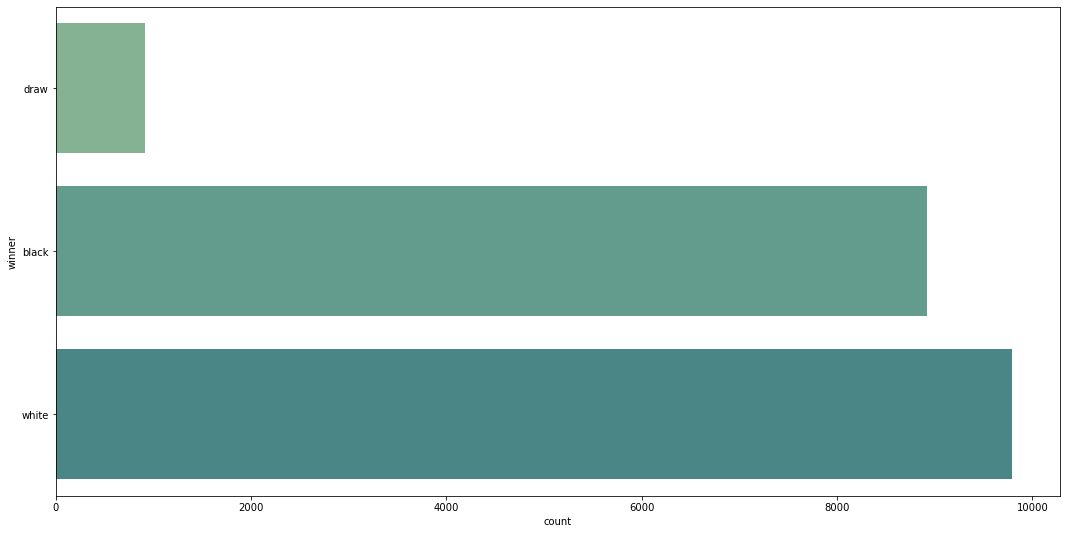

In [418]:
sns.set_palette('crest')
ax = sns.countplot(y = 'winner', data = df1, 
                  order=reversed(df1['winner'].value_counts().index))

plt.show()

From this plot we can conclude that white players win more than black ones.

In [419]:
vic_status = df1['victory_status']
df1['winner'].value_counts()

white    9792
black    8919
draw      918
Name: winner, dtype: int64

In [420]:
winner1 = df1['winner'] == 'white'
winner2 = df1['winner'] == 'black'
winner3 = df1['winner'] == 'draw'

scores1 = vic_status[winner1]
scores2 = vic_status[winner2]
scores3 = vic_status[winner3]

In [421]:
freq1 = scores1.value_counts()
freq2 = scores2.value_counts()
freq3 = scores3.value_counts()

plot_data = pd.DataFrame({'white':freq1, "black": freq2, "draw": freq3})
plot_data.head()


,white,black,draw
draw,NaN,NaN,874.0
mate,3273.0,2915.0,NaN
outoftime,792.0,805.0,44.0
resign,5727.0,5199.0,NaN


In [422]:
plot_data.fillna(0)

,white,black,draw
draw,0.0,0.0,874.0
mate,3273.0,2915.0,0.0
outoftime,792.0,805.0,44.0
resign,5727.0,5199.0,0.0


In [423]:
plot_data = plot_data.div(plot_data.sum(axis=1), axis = 0)*100
plot_data.fillna(0)

,white,black,draw
draw,0.000000,0.000000,100.000000
mate,52.892696,47.107304,0.000000
outoftime,48.263254,49.055454,2.681292
resign,52.416255,47.583745,0.000000


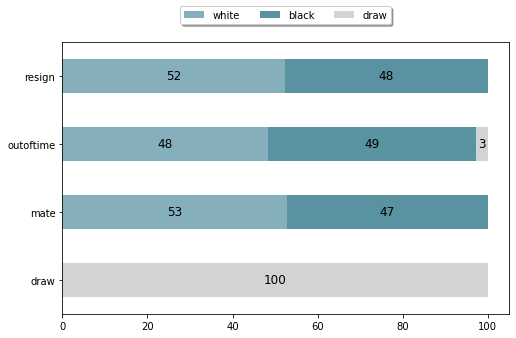

In [424]:
plt.rcParams["figure.figsize"]=(8,5)
color = ['#85b0bb','#5992a0', 'lightgrey']
ax = plot_data.plot(kind='barh', stacked = True, color = color)

plt.legend(['white', 'black', 'draw'], loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5,  shadow=True)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center', size = 12)

This plot itself may not clearly show that in each type of victory there are more white winners than black but as we add the numbers showing percentages of each winner it becomes more clear.

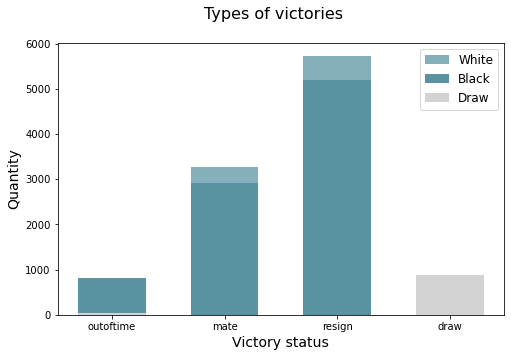

In [425]:
plt.hist(df1.loc[df1['winner']== 'white']['victory_status'], color = '#85b0bb', rwidth = 0.6, align = 'left', bins= range(0,5))
plt.hist(df1.loc[df1['winner']== 'black']['victory_status'], color = '#5992a0',  rwidth = 0.6, align = 'left', bins= range(0,5))
plt.hist(df1.loc[df1['winner']== 'draw']['victory_status'], color = 'lightgrey',  rwidth = 0.6, align = 'left', bins= range(0,5))
plt.xlabel('Victory status', size = 14)
plt.ylabel('Quantity', size = 14)
plt.legend(['White', 'Black', 'Draw'], fontsize=12)
plt.suptitle('Types of victories', size = 16)
plt.show()

##e7b99a

## Hypothesis 2: Does the length of the game (# of moves) affect the result? 

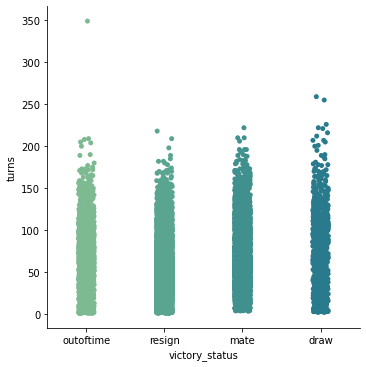

In [426]:
sns.catplot(x="victory_status", y="turns", data= df1)
plt.show()

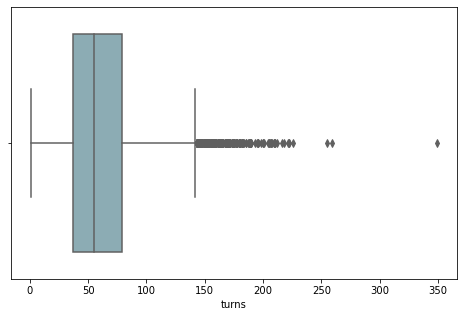

In [427]:
sns.boxplot(x = df1['turns'], color = '#85b0bb')
plt.show()

Dropping values that haves higher turns in order to observe them separately.

In [428]:
df1.drop(df1[df1['turns'] > 135].index, inplace = True)

In [429]:
df1.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,1.903700e+04,1.903700e+04,19037.000000,19037.000000,19037.00000,19037.000000
mean,1.483565e+12,1.483566e+12,57.518201,1593.119767,1584.92336,4.796081
std,2.819118e+10,2.819107e+10,29.297563,289.916242,290.05980,2.789023
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.00000,1.000000
25%,1.477360e+12,1.477360e+12,36.000000,1397.000000,1389.00000,3.000000
50%,1.495674e+12,1.495675e+12,54.000000,1563.000000,1558.00000,4.000000
75%,1.503080e+12,1.503080e+12,76.000000,1787.000000,1777.00000,6.000000
max,1.504493e+12,1.504494e+12,135.000000,2700.000000,2723.00000,28.000000


As we see the shortest game 'lasted' only 1 turn while the 25% percentile lasted 36 turns, the 50% - 76, and the 75% - 76... We will consider 4 types of games bases on number of turns in game.

In [430]:
conditions_time  = [(df1['turns'] <= 18),
              (df1['turns'] > 18) & (df1['turns'] <=  np.percentile(df1['turns'],33)),
              (df1['turns'] > np.percentile(df1['turns'],33)) & (df1['turns'] <= np.percentile(df1['turns'], 67)),
               (df1['turns'] > np.percentile(df1['turns'], 67))]

In [431]:
values = ['very short', 'short', 'middle', 'long']

In [432]:
df1['game_time'] = np.select(conditions_time, values)

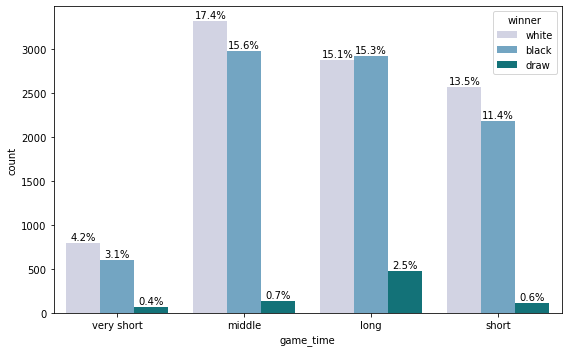

In [433]:
ax = sns.countplot(x="game_time", hue="winner",data=df1, palette = 'PuBuGn')

total = len(df1)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()


As we see from the plot above the percentage of 'draws' is higher for longer games and that very short games are less likely to have winning outcome.

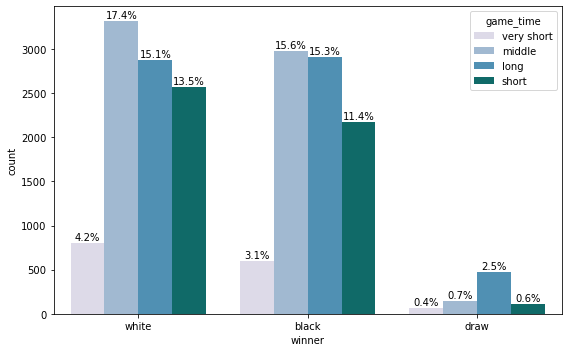

In [434]:
ax = sns.countplot(x="winner", hue="game_time",palette = "PuBuGn", data=df1)

total = len(df1)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()


From this plot too we see that games that are very short or short have lower percentage than the middle and long games... 

<AxesSubplot:>

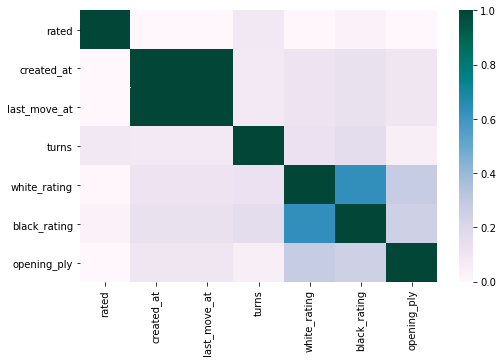

In [435]:
corr = df2.corr()
sns.heatmap(corr, cmap = 'PuBuGn')

## Hypothesis 3: Which openings (the set of first several moves in chess are called openings. As some sequences of moves are very common, they got their names, for example: Queen's gambit, etc.) are the best? Maybe at different levels (rating levels) different openings are performing better?

In [439]:
df = pd.read_csv("games.csv")
df = df.drop_duplicates()
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,1.962900e+04,1.962900e+04,19629.000000,19629.000000,19629.000000,19629.000000
mean,1.483721e+12,1.483722e+12,60.458607,1596.090224,1588.324622,4.804422
std,2.809364e+10,2.809353e+10,33.502852,290.165038,290.164447,2.792791
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477530e+12,1.477530e+12,37.000000,1400.000000,1393.000000,3.000000
50%,1.495830e+12,1.495830e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503107e+12,1.503110e+12,79.000000,1791.000000,1783.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [440]:
df.describe(include = 'O')

,id,victory_status,winner,increment_code,white_id,black_id,moves,opening_eco,opening_name
count,19629,19629,19629,19629,19629,19629,19629,19629,19629
unique,19113,4,3,400,9438,9331,18920,365,1477
top,oCvN8zWL,resign,white,10+0,bleda,docboss,e4 e5,A00,Van't Kruijs Opening
freq,2,10926,9792,7563,48,44,27,992,363


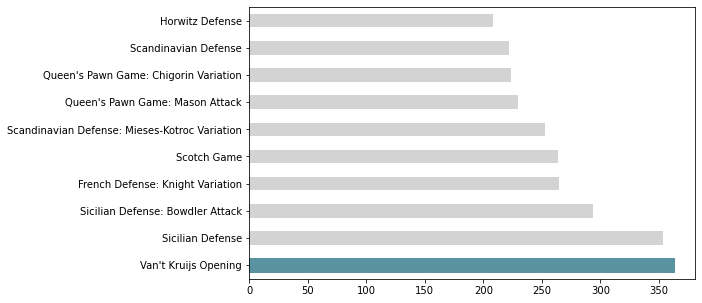

In [441]:
ax = df['opening_name'].value_counts()[:10].plot(kind='barh', color = 'lightgrey')
ax.get_children()[0].set_color('#5992a0')

In the plot above we we the most played 10 openings. As we see the most popular opening is Van't Kruijs Opening. 
Now let's see if for players with different ratings the most populat openings are the same.

In [442]:
conditions_ratings  = [(df['white_rating'] <= 1200),
              (df['white_rating'] > 1200) & (df1['white_rating'] <=  1400),
              (df['white_rating'] > 1400) & (df1['white_rating'] <=  1600),
              (df['white_rating'] > 1600) & (df1['white_rating'] <=  1800),
              (df['white_rating'] > 1800) & (df1['white_rating'] <=  2000),
              (df['white_rating'] > 2000) & (df1['white_rating'] <=  2200),
              (df['white_rating'] > 2200) & (df1['white_rating'] <=  2300),
              (df['white_rating'] > 2300) & (df1['white_rating'] <=  2400),
              (df['white_rating'] > 2400) & (df1['white_rating'] <=  2500),
              (df['white_rating'] > 2500)]

In [443]:
ratings = ['Novices', 'Class D', 'Class C', 'Class B', 'Class A', 'Experts',
          'National masters', 'FIDE masters','International masters', 'Grandmasters']

In [444]:
df['white_ranking'] = np.select(conditions_ratings, ratings)

In [445]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,white_ranking
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,Class C
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,Class D
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,Class C
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,Class C
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,Class C


In [446]:
pd.crosstab(df['opening_name'], df['white_ranking']).sort_values('Class A', ascending = False)

white_ranking,0,Class A,Class B,Class C,Class D,Experts,FIDE masters,Grandmasters,International masters,National masters,Novices
opening_name,,,,,,,,,,,
Sicilian Defense,11,45,76,116,64,11,0,0,1,1,28
Queen's Pawn Game: Mason Attack,8,42,60,72,23,6,0,0,1,7,11
Indian Game,9,35,47,51,14,9,1,0,1,7,6
Sicilian Defense: Bowdler Attack,17,34,67,128,29,3,0,0,0,0,16
Horwitz Defense,7,33,41,54,40,7,2,0,0,4,20
...,...,...,...,...,...,...,...,...,...,...,...
Modern Defense: Two Knights Variation,0,0,2,2,1,0,0,0,0,1,0
Modern Defense: Two Knights Variation | Suttles Variation,1,0,0,0,1,0,0,0,1,0,0
Neo-Gruenfeld Defense,1,0,0,0,0,0,0,0,0,0,0


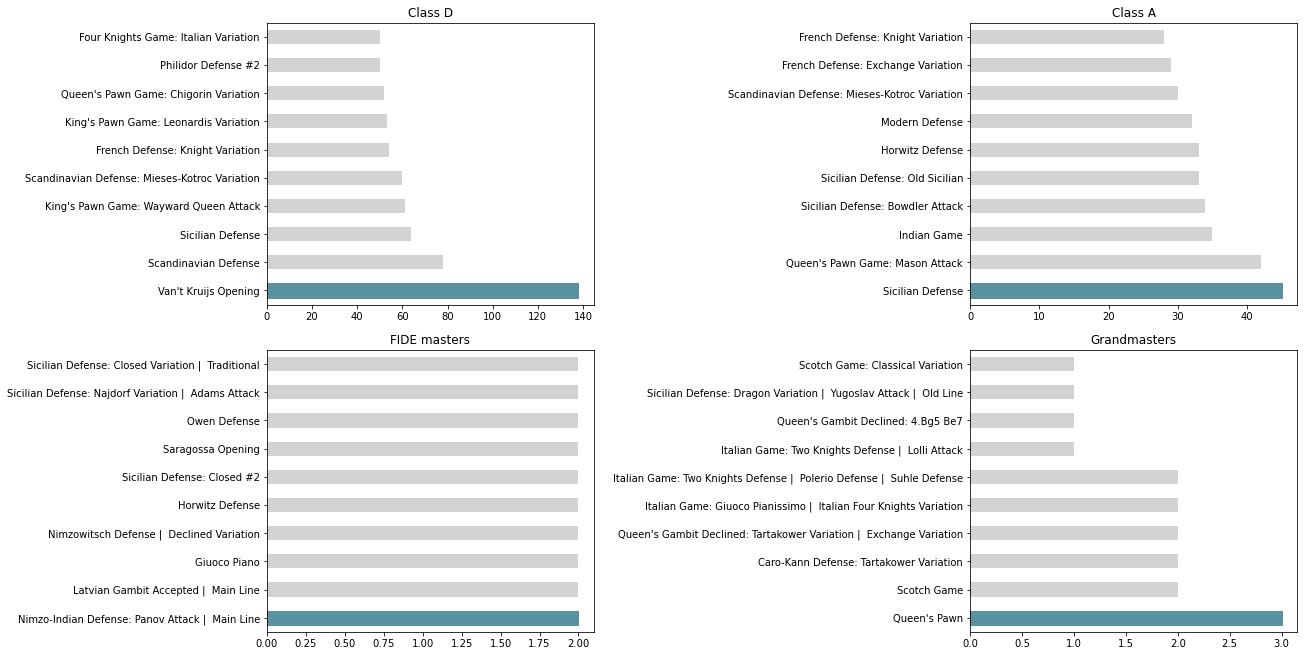

In [447]:
plt.rcParams["figure.figsize"]=(18,9)
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
ax1 = df[df['white_ranking'] == 'Class D']['opening_name'].value_counts()[:10].plot(kind = 'barh', color = 'lightgrey')
ax1.get_children()[0].set_color('#5992a0')
ax1.set_title('Class D')

ax2 = fig.add_subplot(gs[0,1])
ax2 = df[df['white_ranking'] == 'Class A']['opening_name'].value_counts()[:10].plot(kind = 'barh', color = 'lightgrey')
ax2.get_children()[0].set_color('#5992a0')
ax2.set_title('Class A')

ax3 = fig.add_subplot(gs[1,0])
ax3 = df[df['white_ranking'] == 'FIDE masters']['opening_name'].value_counts()[:10].plot(kind = 'barh', color = 'lightgrey')
ax3.get_children()[0].set_color('#5992a0')
ax3.set_title('FIDE masters')

ax4 = fig.add_subplot(gs[1,1])
ax4 = df[df['white_ranking'] == 'Grandmasters']['opening_name'].value_counts()[:10].plot(kind = 'barh', color = 'lightgrey')
ax4.get_children()[0].set_color('#5992a0')
ax4.set_title('Grandmasters')
plt.show()

We see that the most popular openings are different when we take into consideration players' ratings... 
Van't Kruijs opening is mostly popular among the Class D players (whose rating can be considered as middle) and from the plots above we can conclude that in our data we have more games played by Class D players. 